**Install Software**

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.2/606.2 kB 6.1 MB/s eta 0:00:00


**Import YOLO and other libraries**

In [ ]:
from ultralytics import YOLO

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import numpy as np

**Mount the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the trained model**

In [ ]:
model = YOLO('/content/drive/MyDrive/REVA/RSPI/yolov8n_v8_exp/weights/best.pt')

**prediction at cofidence of 0.5**

In [ ]:

source = '/content/drive/MyDrive/REVA/RSPI/test/c_19.jpg'
results_test = model.predict( source, save=True, imgsz=1280, conf=0.50)


image 1/1 /content/drive/MyDrive/REVA/RSPI/test/c_19.jpg: 1280x1280 1 nescafe, 19.5ms
Speed: 9.5ms preprocess, 19.5ms inference, 33.3ms postprocess per image at shape (1, 3, 1280, 1280)
Results saved to runs/detect/predict


In [ ]:
for result in results_test :
  unique, count = np.unique(result.boxes.cpu().cls.numpy(), return_counts=True)
  unique = unique.astype(np.uint8)
  for k, v in dict(zip(unique, count)).items() :
    clsname = result.names.get(k)
    print(f"{v} {clsname} detected")
  print()

1 nescafe detected



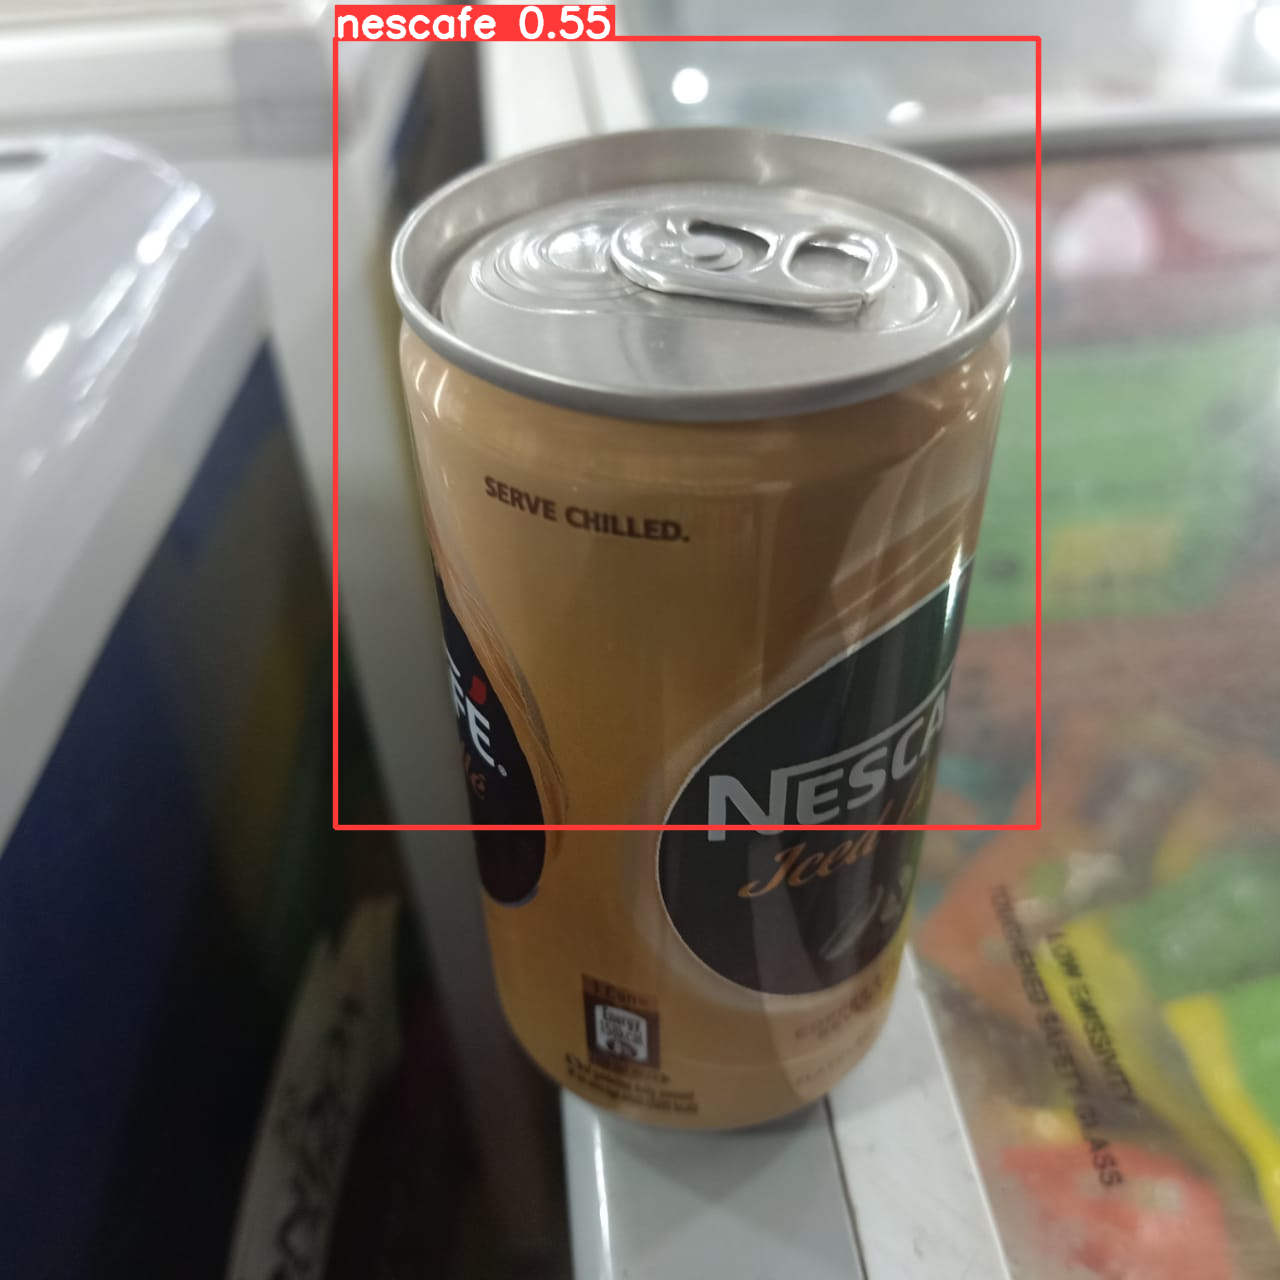

In [ ]:
cv2_imshow( results_test[0].plot())

**prediction at cofidence of 0.30 of miscellaneous**

In [ ]:

source = '/content/drive/MyDrive/REVA/RSPI/misc/IMG-20230101-WA0019.jpg'
results_test = model.predict( source,
                             save=True,
                             imgsz=1280,
                             conf=0.30,
                             iou=0.50
                             )


image 1/1 /content/drive/MyDrive/REVA/RSPI/misc/IMG-20230101-WA0019.jpg: 1280x1280 12 sprites, 19.5ms
Speed: 5.1ms preprocess, 19.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)
Results saved to runs/detect/predict


In [ ]:
for result in results_test :
  unique, count = np.unique(result.boxes.cpu().cls.numpy(), return_counts=True)
  unique = unique.astype(np.uint8)
  for k, v in dict(zip(unique, count)).items() :
    clsname = result.names.get(k)
    print(f"{v} {clsname} detected")
  print()

12 sprite detected



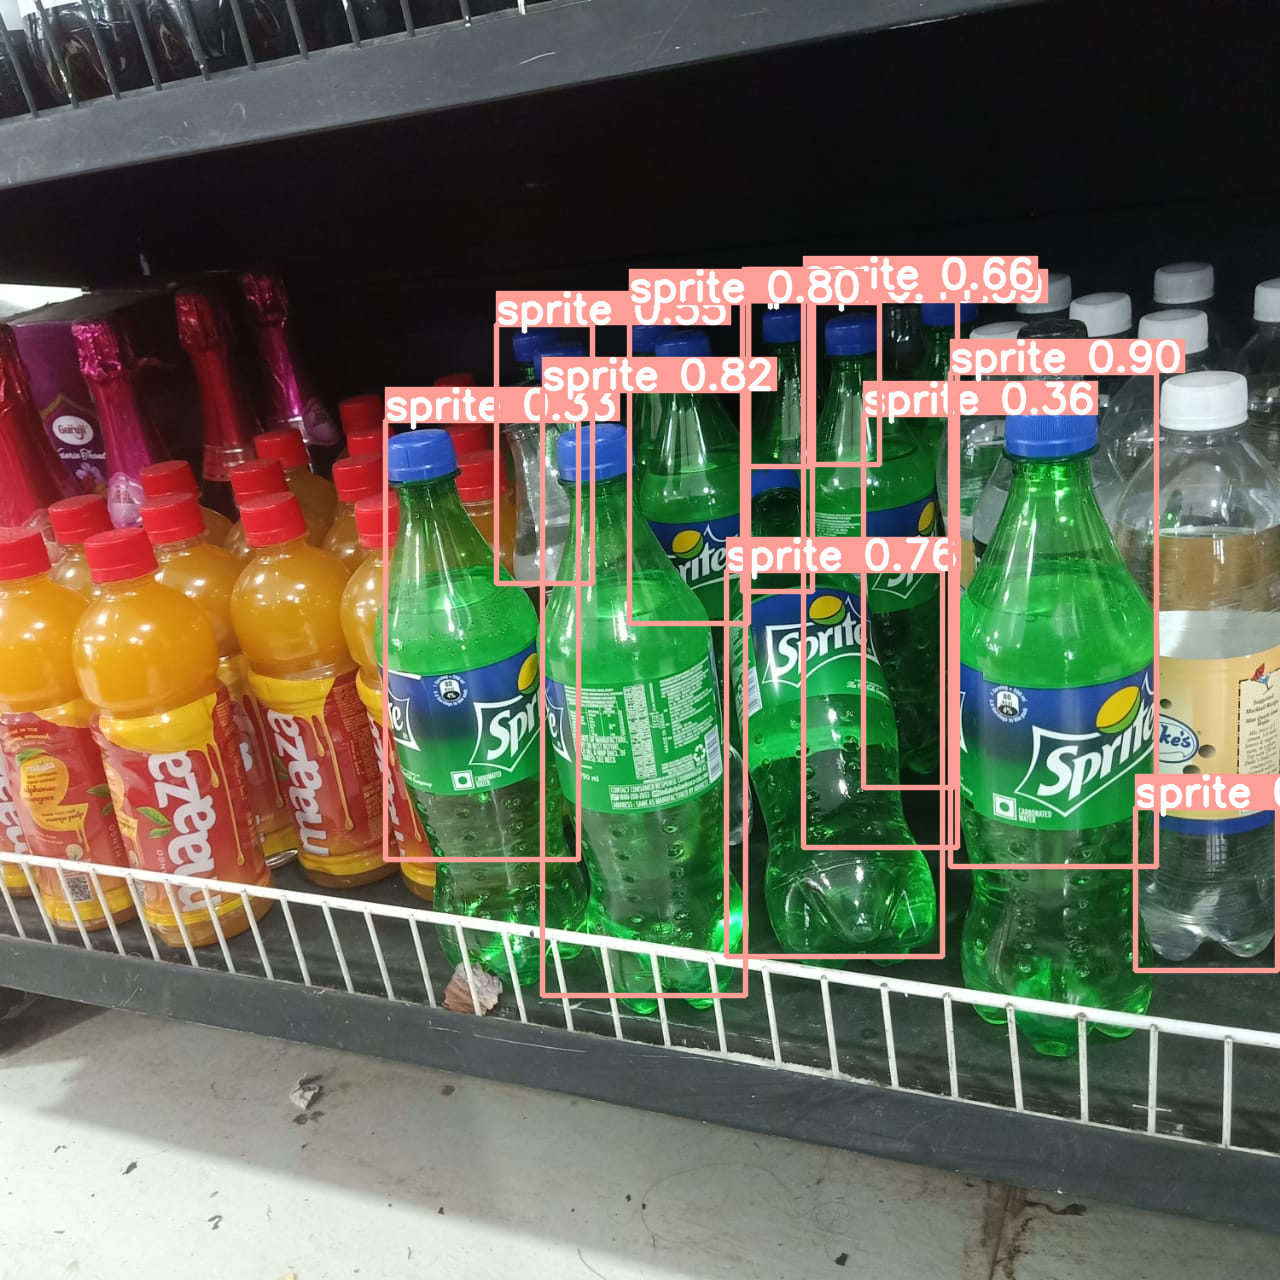

In [ ]:
cv2_imshow( results_test[0].plot())